In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#read data with pandas library
data = pd.read_excel("dataset.xlsx")

In [3]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


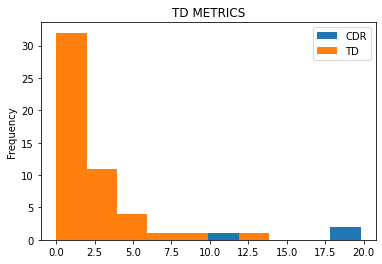

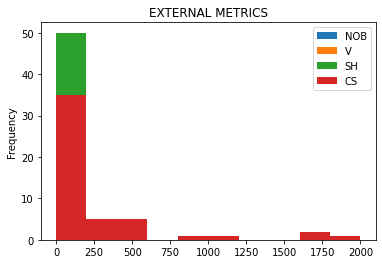

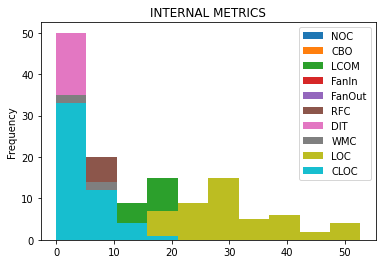

In [4]:
#show the distribution of 3 metrics

# TD metrics
data[['CDR', 'TD']].plot.hist(title="TD METRICS")

# External metrics
data[['NOB', 'V', 'SH', 'CS']].plot.hist(title="EXTERNAL METRICS")

# Internal metrics
data[['NOC', 'CBO', 'LCOM', 'FanIn', 'FanOut', 'RFC', 'DIT', 'WMC', 'LOC', 'CLOC']].plot.hist(title="INTERNAL METRICS")

In [5]:
#Min max scaler for all data
scaler = MinMaxScaler()

# all metrics
all_metrics = scaler.fit_transform(data.loc[:, "NOB":"DIT"])
all_metrics = pd.DataFrame(all_metrics, columns=['NOB', 'V', 'SH', 'CS', 'CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT'])

# TD metrics
td_metrics = scaler.fit_transform(data.loc[:, ['CDR', 'TD']])
td_metrics = pd.DataFrame(td_metrics, columns=['CDR', 'TD'])

# external metrics
ext_metrics = scaler.fit_transform(data.loc[:, ['NOB', 'V', 'SH', 'CS']])
ext_metrics = pd.DataFrame(ext_metrics, columns=['NOB', 'V', 'SH', 'CS'])

# internal metrics
int_metrics = scaler.fit_transform(data.loc[:, ['NOC', 'CBO', 'LCOM', 'FanIn', 'FanOut', 'RFC', 'DIT', 'WMC', 'LOC', 'CLOC']])
int_metrics = pd.DataFrame(int_metrics, columns=['NOC', 'CBO', 'LCOM', 'FanIn', 'FanOut', 'RFC', 'DIT', 'WMC', 'LOC', 'CLOC'])

In [6]:
all_metrics.head()

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032


# Part1 (Statistical Correlation Analysis)

In [7]:
#Show the correlation matrix of all metrics
corr_mat = all_metrics.corr(method="spearman")
corr_mat

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [8]:
#P values of Spearman Correlation Table
corr, p = spearmanr(all_metrics)
pvalues = pd.DataFrame(p, index=['NOB', 'V', 'SH', 'CS', 'CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT'],
                       columns=['NOB', 'V', 'SH', 'CS', 'CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT'])
pvalues

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.000000e+00,2.183273e-08,7.250683e-06,2.736866e-08,0.007590,0.355778,3.281475e-03,1.183066e-02,0.001131,1.274742e-02,0.008359,8.126228e-04,5.138864e-02,0.665085,1.692314e-04,0.085107
V,2.183273e-08,0.000000e+00,9.643803e-07,1.274854e-06,0.048605,0.036375,3.186850e-03,2.026772e-03,0.013849,8.819585e-02,0.146024,5.993740e-04,4.136864e-02,0.837422,4.228574e-03,0.443801
SH,7.250683e-06,9.643803e-07,0.000000e+00,1.694429e-06,0.005813,0.854806,1.399509e-04,4.885268e-03,0.002067,3.712944e-01,0.155173,4.998974e-02,2.789547e-01,0.911550,1.288873e-02,0.456648
CS,2.736866e-08,1.274854e-06,1.694429e-06,0.000000e+00,0.000038,0.175643,3.724378e-03,1.131883e-05,0.000277,1.368994e-03,0.067578,8.506172e-04,5.302098e-03,0.651268,1.563493e-05,0.126863
CDR,7.590282e-03,4.860545e-02,5.813210e-03,3.782810e-05,0.000000,0.926412,1.799895e-01,1.393924e-01,0.091812,1.984074e-02,0.232953,8.809831e-02,9.714306e-02,0.789691,1.455497e-02,0.393505
TD,3.557784e-01,3.637483e-02,8.548056e-01,1.756426e-01,0.926412,0.000000,2.118719e-01,9.250346e-01,0.381878,8.302484e-01,0.429321,9.450086e-02,9.300817e-02,0.905850,3.770595e-01,0.012178
NOC,3.281475e-03,3.186850e-03,1.399509e-04,3.724378e-03,0.179989,0.211872,0.000000e+00,1.204954e-07,0.000008,4.058488e-01,0.035988,5.959094e-02,6.078456e-01,0.925764,2.283032e-01,0.255723
CBO,1.183066e-02,2.026772e-03,4.885268e-03,1.131883e-05,0.139392,0.925035,1.204954e-07,0.000000e+00,0.002315,2.187603e-01,0.079442,5.289834e-06,9.186583e-02,0.448253,2.789223e-04,0.999208
RFC,1.130742e-03,1.384922e-02,2.066568e-03,2.766126e-04,0.091812,0.381878,8.470519e-06,2.315436e-03,0.000000,3.513387e-01,0.006244,2.738000e-03,6.165203e-01,0.001236,7.725072e-05,0.096953
LOC,1.274742e-02,8.819585e-02,3.712944e-01,1.368994e-03,0.019841,0.830248,4.058488e-01,2.187603e-01,0.351339,0.000000e+00,0.380676,2.957400e-05,1.680469e-06,0.651547,6.247236e-08,0.208241


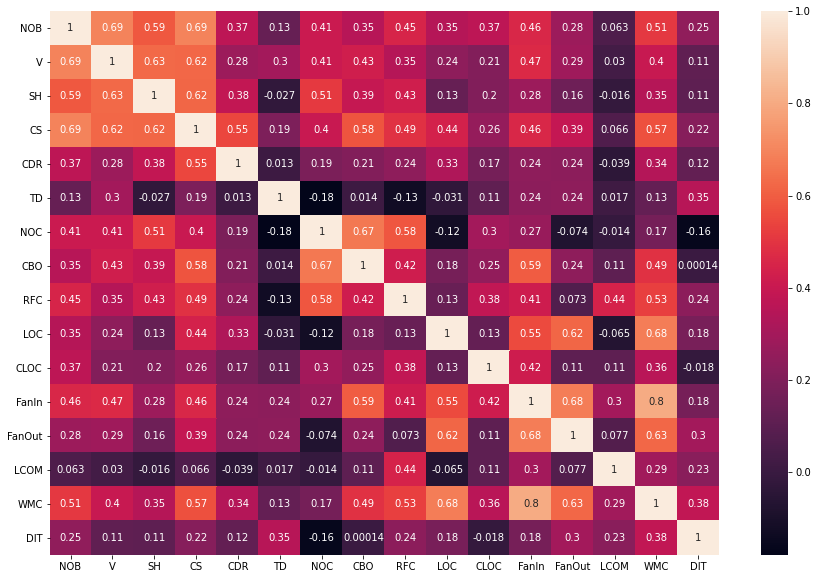

In [36]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, ax=ax);

In [10]:
#Correlation between External Metrics & TD
pd.concat([td_metrics, ext_metrics], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

,CDR,TD
NOB,0.045188,-0.115792
V,0.175517,-0.045441
SH,0.455000,-0.043494
CS,0.260119,-0.015236


In [11]:
#Correlation between Internal Metrics & TD
pd.concat([td_metrics, int_metrics], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

,CDR,TD
NOC,0.160786,-0.235805
CBO,0.171285,-0.116862
LCOM,-0.145200,-0.018478
FanIn,0.169463,0.043951
FanOut,0.243964,0.142802
RFC,0.059865,-0.016734
DIT,0.079976,0.314440
WMC,0.203131,-0.009809
LOC,0.285650,-0.128883
CLOC,0.071360,0.059036


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
    #Plot the Scatter Graph to see results better
    xaxis = list(range(len(y_test)))
    plt.scatter(xaxis, y_test)
    plt.scatter(xaxis, y_pred)
    plt.title(regressorName)
    plt.legend(['true', 'predictions'])
    plt.show()

def evaluate(pred, true):
    mse = mean_squared_error(pred, true)
    mabse = mean_absolute_error(pred, true)
    print("The Mean Squared Error is ",mse)
    print("The Mean Absolute Error is ", mabse)

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test):
    # Create the regressor: reg_all
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    evaluate(predictions, y_test)
    plotGraph(y_test, predictions, "Linear Regression")


#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test):
    model = SVR()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    evaluate(predictions, y_test)
    plotGraph(y_test, predictions, "SVR")


def decisionTreeRegression(X_train,y_train,X_test,y_test):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    evaluate(predictions, y_test)
    plotGraph(y_test, predictions, "Decision Tree Regressor")


def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    evaluate(predictions, y_test)
    plotGraph(y_test, predictions, "Random dec Tree regressor")


#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
    model = MLPRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    evaluate(predictions, y_test)
    plotGraph(y_test, predictions, "MLP Regressor")


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [13]:
#split data into train and test data
datax = int_metrics
datay = td_metrics['TD']
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.3, shuffle=True, random_state=random_state_fixed)

The Mean Squared Error is  0.07025896527425132
The Mean Absolute Error is  0.1822938905102131


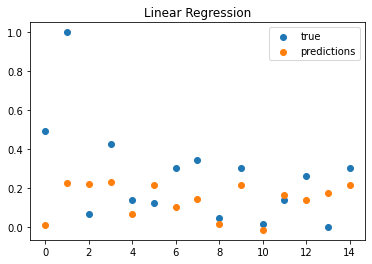

In [14]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.0644859003136405
The Mean Absolute Error is  0.18212448775636264


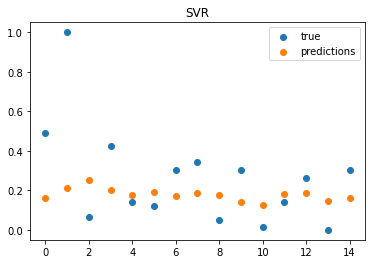

In [15]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.09088058765564815
The Mean Absolute Error is  0.18688524590163938


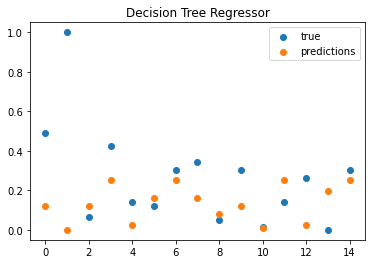

In [16]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.06568802382871987
The Mean Absolute Error is  0.15885245901639344


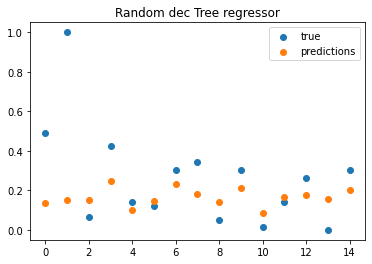

In [17]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.07479005785224217
The Mean Absolute Error is  0.18933759959239843


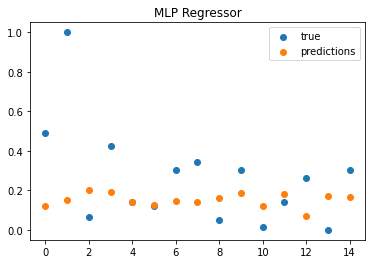

In [18]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(trainx, trainy, testx, testy)

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [19]:
#split data into train and test data
datax = ext_metrics
datay = td_metrics['TD']
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.3, shuffle=True, random_state=random_state_fixed)

The Mean Squared Error is  0.0858442680937875
The Mean Absolute Error is  0.21024512874557544


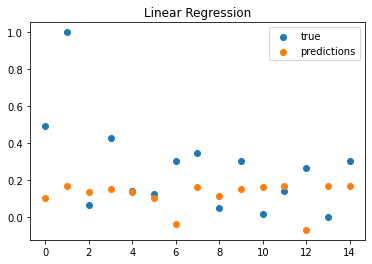

In [20]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.08702143250439488
The Mean Absolute Error is  0.21800190284693058


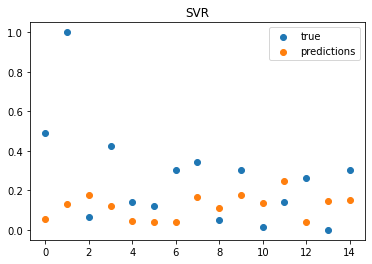

In [21]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.109316491982442
The Mean Absolute Error is  0.24153005464480876


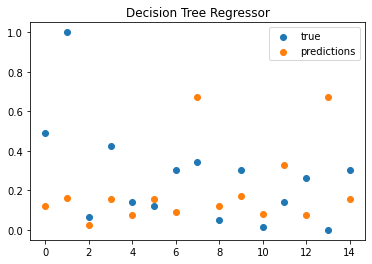

In [22]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.07049642078966227
The Mean Absolute Error is  0.17237704918032784


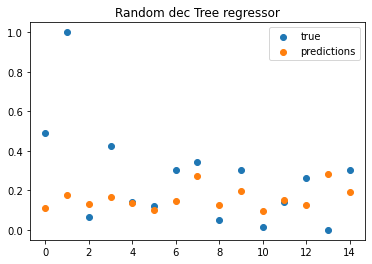

In [23]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.07082747523012775
The Mean Absolute Error is  0.1939776215332561


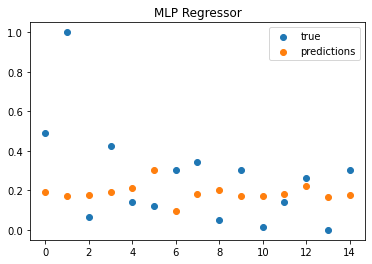

In [24]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(trainx, trainy, testx, testy)

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [25]:
#split data into train and test data
datax = all_metrics[['NOB', 'V', 'SH', 'CS', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']]
datay = td_metrics['TD']
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.3, shuffle=True, random_state=random_state_fixed)

The Mean Squared Error is  0.060116102000001496
The Mean Absolute Error is  0.17268847150928365


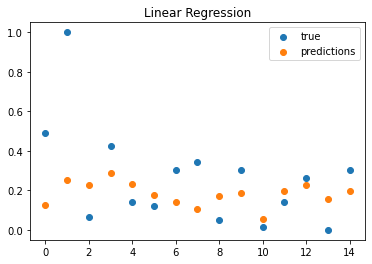

In [26]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.0657211578639546
The Mean Absolute Error is  0.18303925279676955


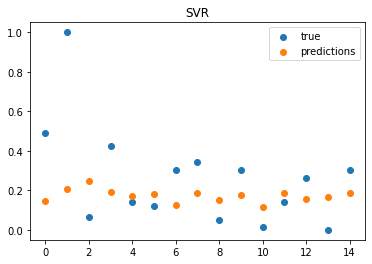

In [27]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.049807399444593746
The Mean Absolute Error is  0.17377049180327866


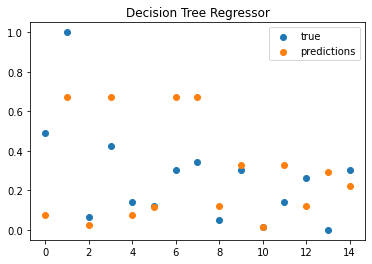

In [28]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.05625680551822987
The Mean Absolute Error is  0.14832786885245902


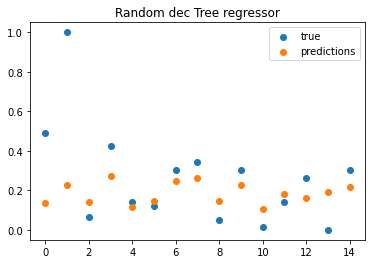

In [29]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(trainx, trainy, testx, testy)

The Mean Squared Error is  0.08682627667986093
The Mean Absolute Error is  0.18625914783154449


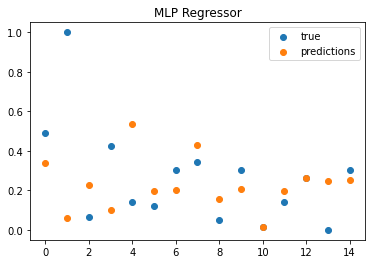

In [30]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(trainx, trainy, testx, testy)